# Title : 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

- 순서
  - 라이브러리 호출
  - 데이터세트 호출
  - *EDA (Exploratory Data Analysis)*
  - *Feature Engineering*
  - 데이터 분리
  - 모델 알고리즘 선택 및 생성, 학습
  - 학습 변수 저장
  - 학습 변수 호출
  - 모델 예측
  - *결과 분석*

In [55]:
# 라이브러리 호출

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [56]:
# Dataset 호출
import pandas as pd

iris = load_iris()

In [57]:
# DataFrame 구성
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [58]:
iris['filename']

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [59]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [60]:
iris_data = iris.data
print(type(iris_data))
iris_label = iris.target

print("iris target: ", iris_label)
print("iris_target name", iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

iris_df.head(3)


<class 'numpy.ndarray'>
iris target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris_target name ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [61]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

In [62]:
# Data shape  확인
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [63]:
#%whos 로 생성된 변수 알아보기
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
Image                    type                      <class 'IPython.core.display.Image'>
X_test                   ndarray                   30x4: 120 elems, type `float64`, 960 bytes
X_train                  ndarray                   120x4: 480 elems, type `float64`, 3840 bytes
accuracy_score           function                  <function accuracy_score at 0x7fee3f534ea0>
clf_from_joblib          DecisionTreeClassifier    DecisionTreeClassifier(cc<...>tate=11, splitter='best')
clf_from_pickle          DecisionTreeClassifier    DecisionTreeClassifier(cc<...>tate=11, splitter='best')
dt_clf                   DecisionTreeClassifier    DecisionTreeClassifier(cc<...>tate=11, splitter='best')
export_graphviz          function                  <function export_graphviz 

In [64]:
#DataFramework info()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [65]:
#DataFramework describe()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [66]:
#알고리즘 생성 및 학습
#DecisionTreeClassifier 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

- pickle 
  - 모델 저장 타입
  - 파이썬에서 지원하는 serializer형태의 저장 방식
  - JSON보다 많은 데이터 타입을 지원 (파이썬에서만)
  - JSON 언어에 상관없이 범용적으로 사용할 수 있는 serializer형태
- joblib
  - 파일 저장

In [67]:
#Save Model
#변수 저장
#파일 저장

import pickle  # 변수로 저장 : model 저장 형태
from sklearn.externals import joblib   #파일로 저장

saved_model = pickle.dumps(dt_clf)

In [68]:
#Load Model
clf_from_pickle = pickle.loads(saved_model)

pred = clf_from_pickle.predict(X_test)

In [69]:
#Save Model
joblib.dump(dt_clf, 'iris_dump.pkl')

['iris_dump.pkl']

In [70]:
clf_from_joblib = joblib.load('iris_dump.pkl')
pred1 = clf_from_joblib.predict(X_test)

In [71]:
#학습이 완료된 모델에 테스트 테이터로 예측 수행
pred2 = dt_clf.predict(X_test)

In [72]:
#Evaluation

from sklearn.metrics import accuracy_score

result = accuracy_score(y_test,pred)
print('예측 정확도: {0:.4f}'.format(result))

result1 = accuracy_score(y_test,pred1)
print('예측 정확도1: {0:.4f}'.format(result1))

result2 = accuracy_score(y_test,pred2)
print('예측 정확도2: {0:.4f}'.format(result2))

예측 정확도: 0.9333
예측 정확도1: 0.9333
예측 정확도2: 0.9333


In [75]:
#compare & check what index
index = (y_test != pred)
print(index)

print(X_test[index])

[False False  True False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False]
[[6.3 2.8 5.1 1.5]
 [6.  2.2 5.  1.5]]


In [ ]:
#Vizulaization : GraphViz

In [51]:
#visualization with graph for tree

from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="dtree.dot", class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

In [52]:
#covert dot to png

import pydot

graph, = pydot.graph_from_dot_file('dtree.dot',encoding='utf8')

graph.write_png('dtree.png')

In [53]:
#Local
from PIL import Image

image = Image.open('./dtree.png')
image.show()

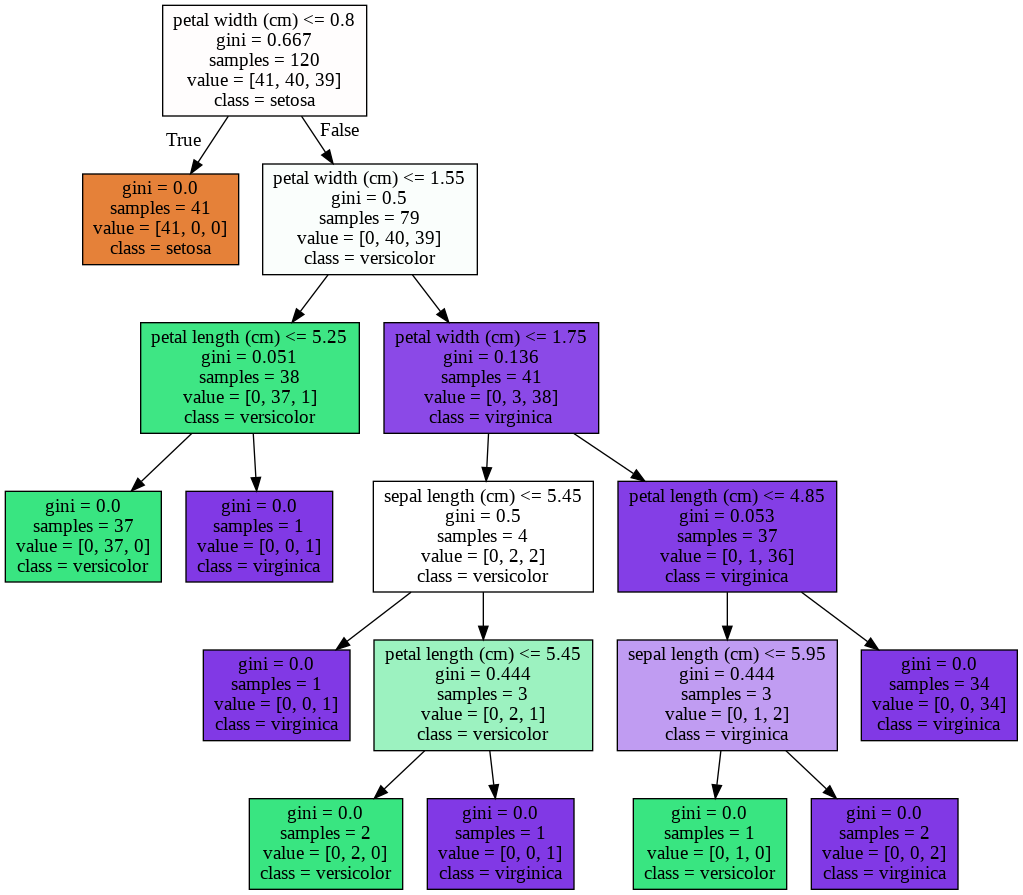

In [54]:
#Colab

from IPython.display import Image
Image('./dtree.png')